In [11]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from ml_functions import get_historical_data
import plotly.express as px


In [2]:
btc_df = get_historical_data('BTC', 730)

In [ ]:
btc_df

In [3]:
btc_df = btc_df.reset_index()

In [ ]:
btc_df.head()

In [4]:
btc_df = btc_df.rename(columns = {'Date': 'ds', 'close': 'y'})

In [5]:
btc_df.head()

,ds,y
0,2018-01-20,12783.94
1,2018-01-21,11549.93
2,2018-01-22,10814.52
3,2018-01-23,10858.23
4,2018-01-24,11429.02


In [6]:
fb_model = Prophet()

In [7]:
fb_model_fit = fb_model.fit(btc_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
forecast_df = fb_model_fit.make_future_dataframe(periods = 5, freq = 'D')

In [9]:
forecast_df = fb_model_fit.predict(forecast_df)

In [10]:
forecast_df = forecast_df[['ds','yhat','yhat_lower', 'yhat_upper']]

In [14]:
forecast_df[725:]

,ds,yhat,yhat_lower,yhat_upper
725,2020-01-15,7704.327618,6787.215126,8610.805706
726,2020-01-16,7630.889819,6768.244300,8542.640772
727,2020-01-17,7641.988177,6818.352953,8565.678704
728,2020-01-18,7627.771636,6752.529237,8483.051260
729,2020-01-19,7560.576937,6665.440388,8401.636615
730,2020-01-20,7509.926795,6631.893619,8409.733961
731,2020-01-21,7400.161470,6513.831667,8316.633303
732,2020-01-22,7304.929175,6394.712467,8204.672724
733,2020-01-23,7171.102933,6193.589728,8019.646077
734,2020-01-24,7126.611854,6260.439699,7991.358333


In [ ]:
forecast_df = forecast_df.set_index('ds')

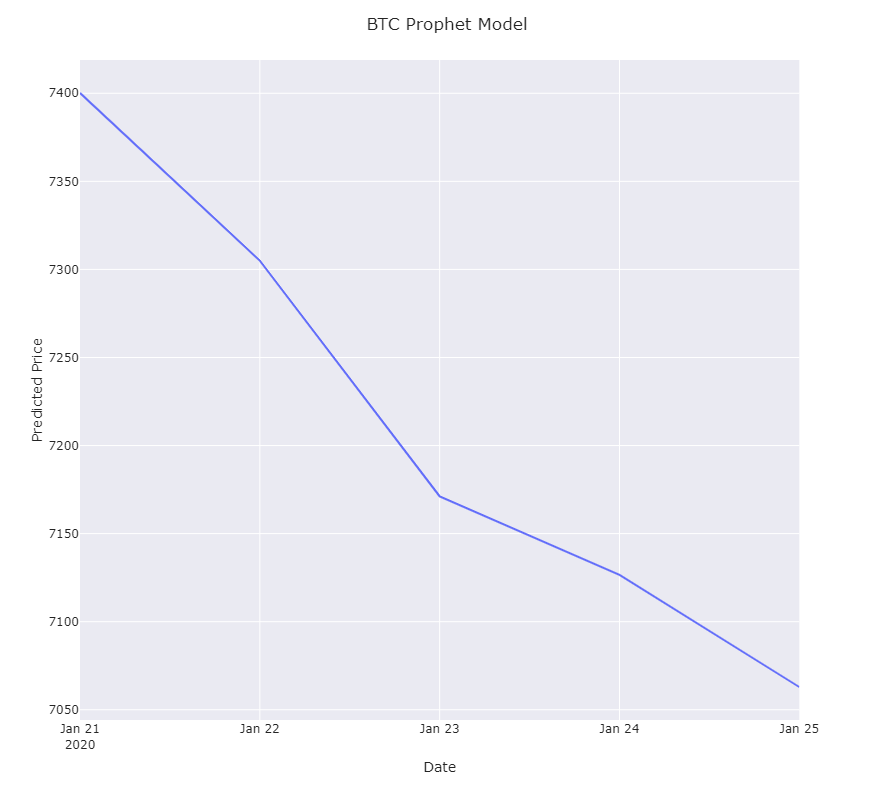

In [13]:
fig = px.line(forecast_df[731:], x = 'ds', y = 'yhat')
fig.update_layout(autosize = True, height = 800, width = 950, title_text = 'BTC Prophet Model', template = 'seaborn')
fig.update_xaxes(nticks = 5, title = 'Date')
fig.update_yaxes(automargin=True, title = 'Predicted Price')